In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Final_Train_Dataset.csv")

In [3]:
test=pd.read_csv("Final_Test_Dataset.csv")

In [4]:
train.shape

(19802, 9)

In [5]:
test.shape

(6601, 7)

In [6]:
train.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [7]:
test.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40


In [14]:
df=pd.concat([train,test],axis="index")

In [15]:
df.head()

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary
0,0.0,3687,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10
1,1.0,458,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15
2,2.0,4195,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25
3,3.0,313,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15
4,4.0,1305,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6


In [17]:
df.shape

(26403, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26403 entries, 0 to 6600
Data columns (total 9 columns):
Unnamed: 0              19802 non-null float64
company_name_encoded    26403 non-null int64
experience              26403 non-null object
job_description         20463 non-null object
job_desig               26403 non-null object
job_type                6434 non-null object
key_skills              26402 non-null object
location                26403 non-null object
salary                  19802 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 2.0+ MB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19802.0,9900.500000,5716.489351,0.0,4950.25,9900.5,14850.75,19801.0
company_name_encoded,26403.0,2114.615536,1416.526483,0.0,912.00,1969.0,3235.50,5034.0


In [24]:
df.isna().sum()

Unnamed: 0               6601
company_name_encoded        0
experience                  0
job_description          5940
job_desig                   0
job_type                19969
key_skills                  1
location                    0
salary                   6601
dtype: int64

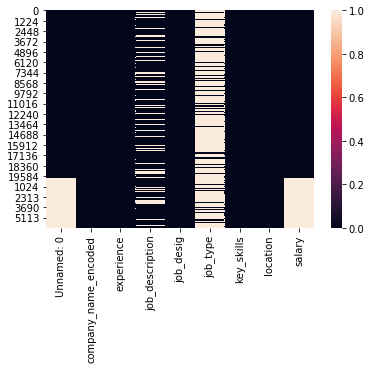

In [31]:
sns.heatmap(df.isna())

In [28]:
df.duplicated().sum()

705

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

## Experience

In [33]:
df.experience.nunique()

132

In [36]:
df.experience.head()

0      5-7 yrs
1    10-17 yrs
2      5-9 yrs
3     7-10 yrs
4      1-3 yrs
Name: experience, dtype: object

In [181]:
max_year=pd.DataFrame(df.experience.transform(lambda x:x.split("-")[1]))

In [182]:
min_year=df.experience.transform(lambda x:x.split("-")[0])

In [183]:
min_year=min_year.astype(int)

In [187]:
max_year.experience.value_counts()

5 yrs     3841
8 yrs     2923
10 yrs    2810
6 yrs     2625
7 yrs     2283
12 yrs    1635
4 yrs     1515
9 yrs     1395
3 yrs     1356
15 yrs     879
2 yrs      804
13 yrs     718
11 yrs     653
20 yrs     449
14 yrs     412
1 yrs      400
18 yrs     293
0 yrs      200
16 yrs     155
25 yrs      96
17 yrs      93
22 yrs      81
19 yrs      23
23 yrs      16
24 yrs      14
21 yrs      12
30 yrs      11
26 yrs       4
28 yrs       2
Name: experience, dtype: int64

In [188]:
max_year=max_year.astype(str)

In [189]:
max_year.experience=max_year.experience.transform(lambda x:x.split(" ")[0]).astype(int)

In [190]:
df["Max_Year"]=max_year

In [191]:
df["Min_Year"]=min_year

In [193]:
df.tail()

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,EXP,location_extracted,Max_Year,Min_Year
6595,NaN,750,5-8 yrs,Experience\t5+ years of diverse functional exp...,Product Head - Mutual Fund,NaN,"Product Training, Team Management, MF, Relatio...",Mumbai,NaN,3.0,Mumbai,8,5
6596,NaN,2692,4-7 yrs,2-9 years experience in full Implementation Li...,Business Analyst - Implementation (p2p/s2p/erp...,NaN,"UAT, Procurement, Case Studies, Life Cycle, Bu...",Mumbai,NaN,1.0,Mumbai,7,4
6597,NaN,104,1-5 yrs,NaN,SAP Basis Administration,NaN,"CRM, SCM, SRM, Computer science, Business proc...",Gurgaon,NaN,6.5,Gurgaon,5,1
6598,NaN,2025,5-10 yrs,- 5- 11yrs of experience in the below skills;-...,Apps Store Developer & Lead - Android/ios/ovi ...,NaN,"android, ios, communication skills, Apps Store...",Mumbai,NaN,5.5,Mumbai,10,5
6600,NaN,464,3-8 yrs,"3 + years of experience designing, developing ...",Webmethods Developer,NaN,"Waterfall, Business Analysis, System Integrati...",Bengaluru,NaN,8.5,Bengaluru,8,3


In [88]:
average=[]
for i,j in zip(df.Max_Year,df.Min_Year):
#     print((i+j)/2)
    average.append((i+j)/2)

In [90]:
type(average)

list

In [94]:
df["EXP"]=pd.DataFrame(average,columns=["Experience"])

In [95]:
df.head()

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,Max_Year,Min_Year,EXP
0,0.0,3687,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,7,5,6.0
1,1.0,458,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,17,10,13.5
2,2.0,4195,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,9,5,7.0
3,3.0,313,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,10,7,8.5
4,4.0,1305,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,3,1,2.0


In [99]:
df.drop(columns={"Max_Year","Min_Year"},inplace=True)

In [100]:
df.head(1)

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,EXP
0,0.0,3687,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,6.0


## Location

In [142]:
df.location.value_counts()

Bengaluru                                                                                5375
Mumbai                                                                                   3244
Gurgaon                                                                                  2153
Pune                                                                                     1572
Hyderabad                                                                                1414
Chennai                                                                                  1272
Delhi NCR                                                                                 956
Noida                                                                                     652
Delhi NCR, Gurgaon                                                                        424
Delhi                                                                                     323
Gurgaon, Gurugram                                           

In [123]:
Loc_10=df.location.value_counts().sort_values(ascending=False).head(12).index

In [124]:
Loc_10

Index(['Bengaluru', 'Mumbai', 'Gurgaon', 'Pune', 'Hyderabad', 'Chennai',
       'Delhi NCR', 'Noida', 'Delhi NCR, Gurgaon', 'Delhi',
       'Gurgaon, Gurugram', 'Kolkata'],
      dtype='object')

In [146]:
def max_features(x):
#     if x=='Bengaluru':
#         return 'Bengaluru'
#     if x=='Mumbai':
#         return 'Mumbai'
#     else:
#         return "Othres"
    if x in Loc_10:
        return x
    else:
        return "Others"

In [149]:
df["location_extracted"]=df.location.transform(lambda x:max_features(x))

In [150]:
df.head()

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,EXP,location_extracted
0,0.0,3687,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,6.0,Others
1,1.0,458,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,13.5,Others
2,2.0,4195,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,7.0,Delhi NCR
3,3.0,313,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,8.5,Bengaluru
4,4.0,1305,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,2.0,Gurgaon


## Job Description

In [151]:
df.job_description.nunique()

10632

In [152]:
df.job_description

0       Exp: Minimum 5 years;Good understanding of IOC...
1       He should have handled a team of atleast 5-6 d...
2       Must be an effective communicator (written & s...
3       7  -  10 years of overall experience in data e...
4       Chartered Accountancy degree or MBA in Finance...
5       4.\tWillingness to travel;5.\tExperience in Te...
6       - Experience in managing fraud analytics with ...
7       Qualified Chartered Accountant with 1-3 yrs of...
8       Proven experience as payroll executive or spec...
9       Other activities as may be required over the p...
10      Manage large volumes of structured and unstruc...
11      - Experience in Credit card/ banking domain wi...
12      3+ years of software development experience;Le...
13      - Knowledge of big data concepts and hands-on ...
14      Job Responsibilities:   \tFinalization of Annu...
15      - Masters/ MS in computer science or other qua...
16      - 2+ years of hands-on experience with the Had...
17      3+ yea

## Job Designation

In [153]:
df.job_desig.nunique()

13845

In [154]:
df.job_desig.value_counts()

Business Analyst                                                          204
Data Scientist                                                            114
Data Analyst                                                               85
Product Manager                                                            74
Digital Marketing Manager                                                  71
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work       70
Digital Marketing Executive                                                57
Analyst                                                                    51
SEO Executive                                                              46
Application Developer                                                      40
Microsoft Advanced Analytics                                               39
Associate                                                                  37
SEO Analyst                                                     

## JOB TYPE

In [155]:
df.job_type.nunique()

5

In [157]:
df.job_type.isna().sum()

19546

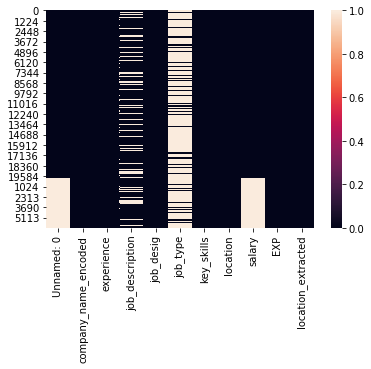

In [161]:
sns.heatmap(df.isna())

## Key Skills

In [168]:
df.key_skills.transform(lambda x:x)

0       team skills, communication skills, analytical ...
1       ppc, logistics, inventory management, supply c...
2       HR Analytics, Employee Engagement, Training, S...
3       SQL, Javascript, Automation, Python, Ruby, Ana...
4       accounting, finance, cash flow, financial plan...
5       academics, effective communication, teacher tr...
6       Fraud Analytics, People Management Skills, Tea...
7       Accounting, Internal Audit, Auditing, Enterpri...
8       esic, hr, bonus, pf, tds, payroll, superannuat...
9       accounting standards, finance, auditing, finan...
10      Test Data, Data Science, Business Analysis, Ma...
11      Banking, Model Development, Analytics, People ...
12      Marketing Automation, Sales, Salesforce, Eloqu...
13      Data Science, Machine Learning, R, Big Data, P...
14       Budgeting, Variance Analysis, Forecasting, Capex
15      Spring, Core Java, J2Ee, Hibernate, Javascript...
16      Hadoop, HBase, Digital Marketing, Netezza, Uni...
17      Busine

In [169]:
df.head()

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,EXP,location_extracted
0,0.0,3687,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,6.0,Others
1,1.0,458,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,13.5,Others
2,2.0,4195,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,7.0,Delhi NCR
3,3.0,313,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,8.5,Bengaluru
4,4.0,1305,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,2.0,Gurgaon


## Company Name

In [170]:
df.company_name_encoded.nunique()

5035

In [171]:
df.company_name_encoded.value_counts()

190     721
1969    324
104     245
1988    236
1305    236
3319    222
4893    147
191     135
910     132
1970    129
1002    113
16      106
4272    106
837      93
911      86
1153     85
1054     81
1114     80
1881     74
1125     69
2914     68
1730     67
1682     65
3931     65
2809     65
4061     64
1526     64
740      64
4541     62
4426     56
       ... 
4833      1
4696      1
4536      1
4504      1
4865      1
2818      1
4488      1
4897      1
4929      1
4753      1
4728      1
2955      1
4872      1
2923      1
4593      1
4609      1
4920      1
2843      1
4888      1
4641      1
2811      1
4744      1
4657      1
4824      1
4673      1
4808      1
4792      1
4776      1
4760      1
4153      1
Name: company_name_encoded, Length: 5035, dtype: int64

## Unamed

In [194]:
df.sample(10)

,Unnamed: 0,company_name_encoded,experience,job_description,job_desig,job_type,key_skills,location,salary,EXP,location_extracted,Max_Year,Min_Year
3570,NaN,1807,1-3 yrs,- Shall have some experience in taking a produ...,Associate Product Manager - SaaS Platform - Ii...,NaN,"sales, marketing research, product management,...",Gurgaon,NaN,7.5,Gurgaon,3,1
8160,8160.0,3458,5-10 yrs,- Prior exposure to Food categories or Male gr...,Opening with Market Research Company for- Reta...,NaN,"market research, rms, retail measurement servi...",Mumbai,10to15,7.5,Mumbai,10,5
4182,4182.0,525,8-11 yrs,Should be aware of overall application archite...,AEM Architect,NaN,"aem, digital marketing, product design, databa...",Bengaluru,15to25,9.5,Bengaluru,11,8
8465,8465.0,910,12-15 yrs,Customer experience and Servicing analytics: A...,Specialized Analytics Group Manager,Analytics,"Forecasting, RF, Underwriting, Relationship ma...",Bengaluru,6to10,13.5,Bengaluru,15,12
16939,16939.0,902,3-5 yrs,NaN,Software Engineer- Core Java/python,NaN,"JSON, Core Java, Cassandra, Javascript, GIT, D...",Gurgaon,6to10,4.0,Gurgaon,5,3
15418,15418.0,3246,3-8 yrs,Experience in web development activity using ....,Hiring Sitecore Dev/sr.dev/lead @ Perficient N...,NaN,"c#, asp.net, windows forms, windows communicat...",Nagpur,6to10,5.5,Others,8,3
546,NaN,203,1-5 yrs,Knowledge of commodities is must;Experience a...,Relationship Manager || Commodity,NaN,"commodity trading, commodity dealer, Commodity...",Mumbai,NaN,13.5,Mumbai,5,1
6981,6981.0,3824,2-7 yrs,"Proficient in spreadsheets, databases, MS Offi...",Financial Analyst,NaN,"Finance, Financial Analysis, Financial Modelli...",Bengaluru,0to3,4.5,Bengaluru,7,2
2040,NaN,740,6-11 yrs,Having a strong working knowledge of Benchmark...,DPS Assistant Manager - Benchmarking Supervisi...,analytic,"rm, team management, customer service, people ...",Gurgaon,NaN,3.5,Gurgaon,11,6
901,901.0,911,4-6 yrs,4 to 5 years of work experience in Reporting a...,Manger - Private Bank Reporting,NaN,"rwa, financial products, balance sheet, financ...",Mumbai,15to25,5.0,Mumbai,6,4


In [195]:
df.salary.value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [197]:
df.columns

Index(['Unnamed: 0', 'company_name_encoded', 'experience', 'job_description',
       'job_desig', 'job_type', 'key_skills', 'location', 'salary', 'EXP',
       'location_extracted', 'Max_Year', 'Min_Year'],
      dtype='object')

In [201]:
df1=df.drop(columns={"Unnamed: 0",'experience','job_description','job_desig','job_type','key_skills','EXP','location','Min_Year'})

In [202]:
df1

,company_name_encoded,salary,location_extracted,Max_Year
0,3687,6to10,Others,7
1,458,10to15,Others,17
2,4195,15to25,Delhi NCR,9
3,313,10to15,Bengaluru,10
4,1305,3to6,Gurgaon,3
5,4428,6to10,Noida,10
6,1988,25to50,Delhi NCR,15
7,1793,6to10,Pune,10
8,3398,0to3,Others,3
9,3444,15to25,Others,6


In [204]:
cat_col=pd.get_dummies(df1.location_extracted)

In [208]:
num_col=df1[{"company_name_encoded","salary","Max_Year"}]

In [212]:
df1_prcd=pd.concat([cat_col,num_col],axis="columns")

In [213]:
df1_prcd.head()

,Bengaluru,Chennai,Delhi,Delhi NCR,"Delhi NCR, Gurgaon",Gurgaon,"Gurgaon, Gurugram",Hyderabad,Kolkata,Mumbai,Noida,Others,Pune,company_name_encoded,salary,Max_Year
0,0,0,0,0,0,0,0,0,0,0,0,1,0,3687,6to10,7
1,0,0,0,0,0,0,0,0,0,0,0,1,0,458,10to15,17
2,0,0,0,1,0,0,0,0,0,0,0,0,0,4195,15to25,9
3,1,0,0,0,0,0,0,0,0,0,0,0,0,313,10to15,10
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1305,3to6,3


## Train and Test split

In [228]:
train_new=df1_prcd[df1_prcd.salary.notna()]

In [229]:
test_new=df1_prcd[df1_prcd.salary.isna()]

In [230]:
train_new.shape

(19802, 16)

In [231]:
test_new.shape

(5896, 16)

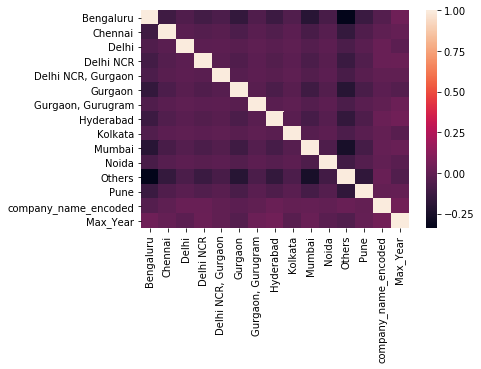

In [233]:
sns.heatmap(df1_prcd.corr())

## X and Y split

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X=train_new.drop(columns="salary")

In [236]:
y=train_new["salary"]

In [237]:
train_x,test_x,train_y,test_y=train_test_split(X, y, test_size=0.3,random_state=99)

In [319]:
from sklearn.preprocessing import StandardScaler

In [320]:
scale=StandardScaler()

In [321]:
scaled_x=scale.fit_transform(X)

In [328]:
test_x=test_new.drop(columns="salary")

## Model_Sel

In [239]:
from sklearn.metrics import accuracy_score

In [241]:
def model_sel(model,X,y):
    train_x,test_x,train_y,test_y=train_test_split(X, y, test_size=0.3,random_state=99)
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    print("Train Accuracy: ",accuracy_score(train_y,train_pred))
    print("Test Accuracy: ",accuracy_score(test_y,test_pred))

## Logistic Regreesion

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
log=LogisticRegression()

In [244]:
model_sel(log,X,y)

Train Accuracy:  0.387562224947695
Test Accuracy:  0.3768725803736745


In [322]:
model_sel(log,scaled_x,y)

Train Accuracy:  0.3872736454801241
Test Accuracy:  0.37889244234977276


## KNN

In [245]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
knn=KNeighborsClassifier(37)

In [264]:
model_sel(knn,X,y)

Train Accuracy:  0.4010533150566337
Test Accuracy:  0.35919878808281436


In [323]:
model_sel(knn,scaled_x,y)

Train Accuracy:  0.43445638842796336
Test Accuracy:  0.3974078437973405


## Decission Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier

In [292]:
dt=DecisionTreeClassifier(max_depth=8)

In [293]:
model_sel(dt,X,y)

Train Accuracy:  0.4392179496428829
Test Accuracy:  0.40346742972563543


In [324]:
model_sel(dt,scaled_x,y)

Train Accuracy:  0.4392179496428829
Test Accuracy:  0.40363575155697695


## Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
rf=RandomForestClassifier(min_samples_split=75)

In [311]:
model_sel(rf,X,y)

Train Accuracy:  0.48243272491162253
Test Accuracy:  0.4181114290523481


## Adaboost

In [312]:
from sklearn.ensemble import AdaBoostClassifier

In [317]:
ada=AdaBoostClassifier(rf)

In [318]:
model_sel(ada,X,y)

Train Accuracy:  0.5429622682346151
Test Accuracy:  0.36997138528867196


## Submission

In [325]:
pd.read_excel("sample_submission.xlsx")

,salary
0,6to10
1,10to15
2,15to25
3,10to15
4,3to6
5,6to10
6,25to50
7,6to10
8,0to3
9,15to25


In [345]:
result=ada.predict(test_x)

In [348]:
result_ada=pd.DataFrame(result,columns=["salary"])

In [353]:
result_ada

,salary
0,25to50
1,0to3
2,6to10
3,0to3
4,6to10
5,6to10
6,15to25
7,0to3
8,10to15
9,0to3


In [349]:
result_ada.salary.value_counts()

10to15    1470
0to3      1308
15to25    1139
6to10     1052
3to6       568
25to50     359
Name: salary, dtype: int64

In [354]:
result_ada.to_excel("ADA.xlsx",index=False)

In [355]:
pd.read_excel('ADA.xlsx')

,salary
0,25to50
1,0to3
2,6to10
3,0to3
4,6to10
5,6to10
6,15to25
7,0to3
8,10to15
9,0to3


In [356]:
result_dt=dt.predict(test_x)

In [357]:
result_dt_df=pd.DataFrame(result_dt,columns=["salary"])

In [358]:
result_dt_df.to_excel("DT_MD_8.xlsx",index=False)

In [359]:
result_dt_df.to_excel("DT.xlsx")